<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan_7__Regresi%20Data_Satelit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/dataset_satelit.csv')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [2]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [3]:
df1 = (
    df[[
    'N',
    'b12', 'b11', 'b9','b8','b7','b6','b5','b4','b3','b2','b1',
    'Sigma_VV',
    'Sigma_VH',
    'plia',
    'lia',
    'iafe',
    'gamma0_vv',
    'gamma0_vh',
    'beta0_vv',
    'beta0_vh']]
    .rename(columns={
        "N": "nitrogen",

    })
    .copy()
)
df1.head()

,nitrogen,b12,b11,b9,b8,b7,b6,b5,b4,b3,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,2.64,0.1013,0.1922,0.4753,0.2930,0.3066,0.0897,0.2467,0.0432,0.0548,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2.75,0.1057,0.1941,0.4811,0.2828,0.2953,0.0939,0.2385,0.0626,0.0677,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,1.77,0.0836,0.1750,0.4981,0.3166,0.3346,0.0866,0.2599,0.0444,0.0622,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,2.30,0.0818,0.1740,0.4603,0.3256,0.3386,0.0883,0.2656,0.0406,0.0594,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,2.05,0.0725,0.1598,0.4655,0.2918,0.3324,0.0882,0.2625,0.0364,0.0559,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [4]:
#Matriks korelasi
corr_matrix = df1.corr()
print(corr_matrix)

           nitrogen       b12       b11        b9        b8        b7  \
nitrogen   1.000000  0.098796 -0.462297  0.535288  0.526838 -0.333109   
b12        0.098796  1.000000  0.350680  0.260295  0.250980  0.400550   
b11       -0.462297  0.350680  1.000000 -0.743976 -0.746170  0.908972   
b9         0.535288  0.260295 -0.743976  1.000000  0.998616 -0.608643   
b8         0.526838  0.250980 -0.746170  0.998616  1.000000 -0.613996   
b7        -0.333109  0.400550  0.908972 -0.608643 -0.613996  1.000000   
b6        -0.509165  0.453561  0.807135 -0.563355 -0.568855  0.841873   
b5         0.376916  0.784287  0.258707  0.243348  0.229821  0.367924   
b4        -0.126046  0.782760  0.617056 -0.219559 -0.232709  0.615960   
b3        -0.137538  0.774701  0.613899 -0.209447 -0.222769  0.628984   
b2         0.064155  0.857581  0.303158  0.171132  0.157855  0.356350   
b1         0.312106  0.839555 -0.092184  0.584164  0.573156  0.022537   
Sigma_VV   0.454871  0.200989 -0.646425  0.846110  

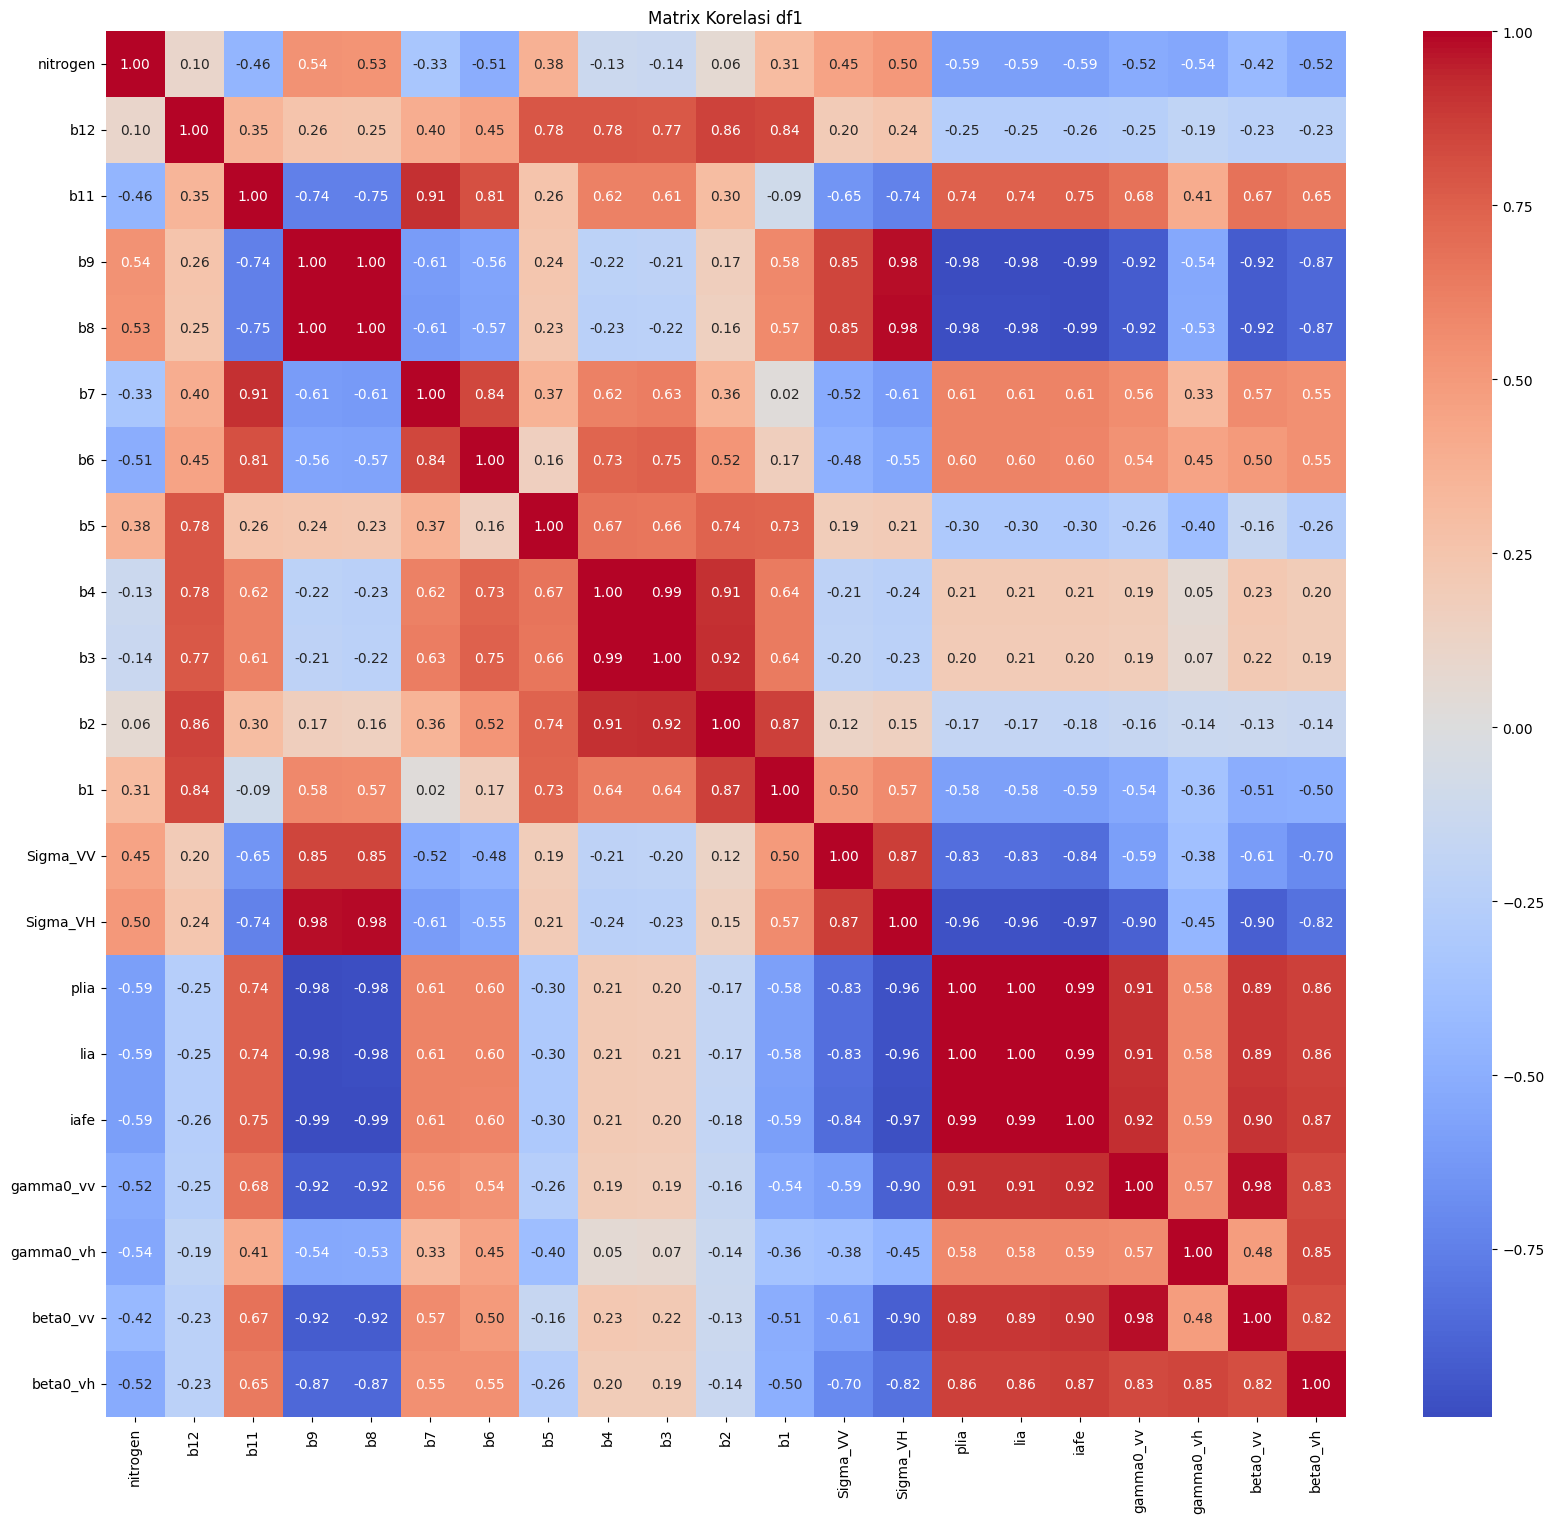

In [5]:
#Head Grafik
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrix Korelasi df1")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # Variabel dependen
y = df1["nitrogen"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["b9", "b8", "b6", "Sigma_VH", "Sigma_VV", "plia", "lia", "iafe", "gamma0_vv", "gamma0_vh", "beta0_vh", "b2"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # random_state supaya hasil konsisten
)

# Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

# Cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train : 475
Jumlah data test : 119


,b9,b8,b6,Sigma_VH,Sigma_VV,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vh,b2
155,1.57940,0.39780,0.32630,0.05991,0.18211,33.18745,33.24034,33.60472,0.21882,0.07199,0.10805,0.3066
550,41.74388,40.14351,0.03031,0.29540,0.31030,0.28010,0.21500,0.06960,0.02420,0.03770,0.02220,0.1906
132,0.60880,0.36800,0.11790,0.03281,0.22994,34.18212,34.18391,34.59766,0.27959,0.03990,0.05768,0.0653
450,0.48750,0.42960,0.38760,0.04831,0.18466,38.56204,38.56239,38.96565,0.23763,0.06217,0.07676,0.2734
287,0.44200,0.39960,0.33830,0.04409,0.16274,41.77033,41.77930,38.98373,0.20948,0.05676,0.07003,0.0585


In [7]:
#tambah konstanta
import statsmodels.api as sm
x_train_const = sm.add_constant(X_train)
x_train_const.head()

,const,b9,b8,b6,Sigma_VH,Sigma_VV,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vh,b2
155,1.0,1.57940,0.39780,0.32630,0.05991,0.18211,33.18745,33.24034,33.60472,0.21882,0.07199,0.10805,0.3066
550,1.0,41.74388,40.14351,0.03031,0.29540,0.31030,0.28010,0.21500,0.06960,0.02420,0.03770,0.02220,0.1906
132,1.0,0.60880,0.36800,0.11790,0.03281,0.22994,34.18212,34.18391,34.59766,0.27959,0.03990,0.05768,0.0653
450,1.0,0.48750,0.42960,0.38760,0.04831,0.18466,38.56204,38.56239,38.96565,0.23763,0.06217,0.07676,0.2734
287,1.0,0.44200,0.39960,0.33830,0.04409,0.16274,41.77033,41.77930,38.98373,0.20948,0.05676,0.07003,0.0585


In [8]:
import statsmodels.api as sm
# Buat model OLS
model = sm.OLS(y_train, x_train_const).fit()
print('========================')
print(model.params)
print('========================')
const = model.params['const']
x1_b9 = model.params['b9']
x2_b8 = model.params['b8']
x3_b6 = model.params['b6']
x4_Sigma_VH = model.params['Sigma_VH']
x5_plia = model.params['plia']
x6_lia = model.params['lia']
x7_iafe = model.params['iafe']
x8_gamma0_vv = model.params['gamma0_vv']
x9_gamma0_vh = model.params['gamma0_vh']
x10_beta0_vh = model.params['beta0_vh']
# print persamaan regresl
print(f"y = {const:.3f} + {x1_b9:.3f}+ {x2_b8:.3f} + {x3_b6:.3f}+ {x4_Sigma_VH:.3f} + {x5_plia:.3f} + {x6_lia:.3f}+ {x7_iafe:.3f} + {x8_gamma0_vv:.3f}+ {x9_gamma0_vh:.3f}  + {x10_beta0_vh:.3f} *x2")

const        5.562321
b9           0.013356
b8          -0.089369
b6           0.051866
Sigma_VH    -0.791720
Sigma_VV     1.712500
plia        -0.013714
lia          0.007476
iafe        -0.085982
gamma0_vv   -1.353816
gamma0_vh   -6.316613
beta0_vh     5.461587
b2          -0.406646
dtype: float64
y = 5.562 + 0.013+ -0.089 + 0.052+ -0.792 + -0.014 + 0.007+ -0.086 + -1.354+ -6.317  + 5.462 *x2


In [9]:
#Tampilkan Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               nitrogen   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     55.06
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           3.49e-81
Time:                        14:43:27   Log-Likelihood:                -22.413
No. Observations:                 475   AIC:                             70.83
Df Residuals:                     462   BIC:                             124.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5623      0.560      9.934      0.0

In [10]:
import numpy as np
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi nilai Nitrogen (N)
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "B9": X_test["b9"].to_numpy(),
    "B8": X_test["b8"].to_numpy(),
    "B6": X_test["b6"].to_numpy(),
    "Sigma_VH": X_test["Sigma_VH"].to_numpy(),
    "plia": X_test["plia"].to_numpy(),
    "lia": X_test["lia"].to_numpy(),
    "iafe": X_test["iafe"].to_numpy(),
    "gamma0_vh": X_test["gamma0_vh"].to_numpy(),
    "beta0_vh": X_test["beta0_vh"].to_numpy(),
    "nitrogen_Aktual": y_test.to_numpy(),
    "Nitrogen Prediksi": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih Error (N)"] = hasil["Nitrogen Prediksi"] - hasil["nitrogen_Aktual"]

# 2) Akurasi per-baris (100 * (1 - |error/aktual|))
denom = hasil["nitrogen_Aktual"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = ((1 - (hasil["Selisih Error (N)"].abs() / denom))
                        .clip(lower=0, upper=1)) * 100

# Tampilkan hasil
hasil.head()

,B9,B8,B6,Sigma_VH,plia,lia,iafe,gamma0_vh,beta0_vh,nitrogen_Aktual,Nitrogen Prediksi,Selisih Error (N),Akurasi (%)
30,0.5792,0.3274,0.1084,0.04001,34.73067,34.78096,35.50120,0.04919,0.06878,2.69,2.301891,-0.388109,85.572147
299,0.4555,0.4064,0.3715,0.05493,36.34398,36.34494,39.02545,0.07074,0.08715,2.28,1.920241,-0.359759,84.221096
177,1.5794,0.4304,0.3944,0.05376,35.88374,35.92427,33.69036,0.06466,0.09674,2.48,2.387266,-0.092734,96.260723
204,1.5794,0.4628,0.4320,0.04927,33.54766,33.59949,33.71030,0.05928,0.08862,2.66,2.368911,-0.291089,89.056786
354,0.4468,0.4016,0.3323,0.04491,38.10647,38.14969,39.07763,0.05788,0.07118,2.46,1.908021,-0.551979,77.561834


In [11]:
display(hasil.head())
mean_accuracy = hasil['Akurasi (%)'].mean()
print(f"\nMean Accuracy: {mean_accuracy:.2f}%")

,B9,B8,B6,Sigma_VH,plia,lia,iafe,gamma0_vh,beta0_vh,nitrogen_Aktual,Nitrogen Prediksi,Selisih Error (N),Akurasi (%)
30,0.5792,0.3274,0.1084,0.04001,34.73067,34.78096,35.50120,0.04919,0.06878,2.69,2.301891,-0.388109,85.572147
299,0.4555,0.4064,0.3715,0.05493,36.34398,36.34494,39.02545,0.07074,0.08715,2.28,1.920241,-0.359759,84.221096
177,1.5794,0.4304,0.3944,0.05376,35.88374,35.92427,33.69036,0.06466,0.09674,2.48,2.387266,-0.092734,96.260723
204,1.5794,0.4628,0.4320,0.04927,33.54766,33.59949,33.71030,0.05928,0.08862,2.66,2.368911,-0.291089,89.056786
354,0.4468,0.4016,0.3323,0.04491,38.10647,38.14969,39.07763,0.05788,0.07118,2.46,1.908021,-0.551979,77.561834



Mean Accuracy: 90.87%
